In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso,LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

[28.67684216]
-2.088699766134101
0.71337703667083


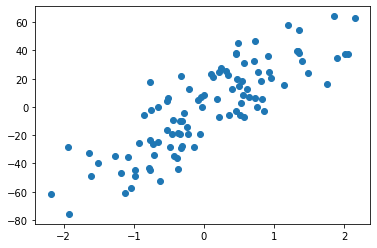

In [5]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
plt.scatter(X,y)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)
y_pred = lin_reg.predict(X_test)
print(r2_score(y_test,y_pred))

C:\Users\User\AppData\Local\Temp\ipykernel_1872\103508556.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  las_reg.fit(X_train,y_train)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+04, tolerance: 7.705e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


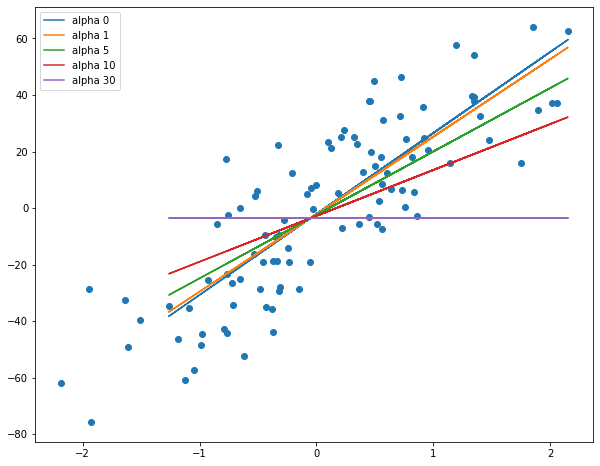

In [7]:
alphas = [0,1,5,10,30]

plt.figure(figsize=(10,8))
plt.scatter(X,y)

for i in alphas:
    las_reg = Lasso(alpha=i)
    las_reg.fit(X_train,y_train)
    plt.plot(X_test,las_reg.predict(X_test),label = "alpha {}".format(i))
plt.legend()
plt.show()

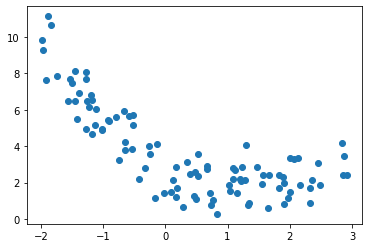

In [8]:
m = 100
x = 5 * np.random.rand(m,1) - 2
y = 0.7 * x ** 2 - 2 * x + 3 + np.random.randn(m,1)

plt.scatter(x,y)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.583e+01, tolerance: 5.972e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.ene

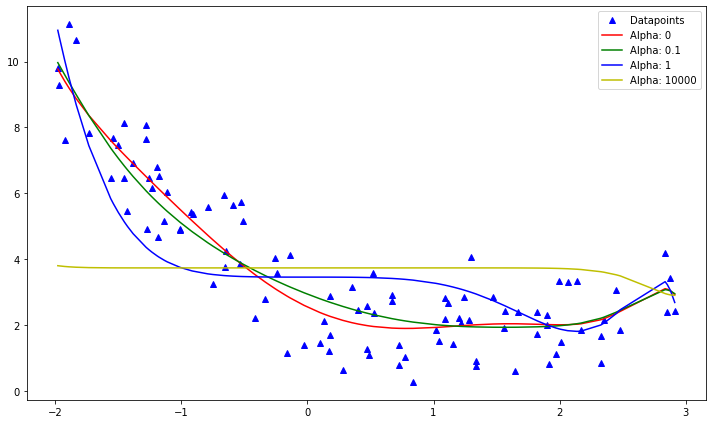

In [23]:
def lasso_curves(x,y,alpha):
    lasso_regression = Pipeline([
        ('poly_features',PolynomialFeatures(degree = 16)),
        ('lasso',Lasso(alpha = alpha))
    ])
    
    lasso_regression.fit(x,y)
    return lasso_regression.predict(x)

alphas = [0,0.1,1,10000]  
cs = ['r','g','b','y']

plt.figure(figsize=(10,6))
plt.plot(x,y,'b^',label = 'Datapoints')

for alpha,c in zip(alphas,cs):
    pred = lasso_curves(x,y,alpha)
    plt.plot(sorted(x[:,0]),pred[np.argsort(x[:,0])],c,label = 'Alpha: {}'.format(alpha))
    #If the data is not sorted than the graph will look disasterous.
plt.legend()
plt.tight_layout()
plt.show()